# 1.0V

## Script orientado al PRE-PROCESADO de datos

### Acciones realizadas:

1. **Limpieza de Datos**:
    - Identificación y eliminación de valores NaN
    - Interpolación lineal para valores faltantes

2. **Análisis de Tendencias y Patrones Estacionales**:
    - Resampleo diario y Semanal

3. **Correlación de Características**

4. **Análisis de Outliers**

5. **Generación de nuevo csv de datos preprocesados y normalizados**

In [431]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [432]:
# DEFINIR NOMBRE DEL ARCHIVO CSV A GENERAR (CAMBIAR NOMBRE SI HYA MODIFICACIONES DE CÓDIGO)
n = '0'

In [433]:
# Cargar los datos proporcionados
data = pd.read_csv('time_series_60min_singleindex.csv', parse_dates=['utc_timestamp'], index_col='utc_timestamp')


In [434]:
data.head(10)

,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,BE_wind_generation_actual,BE_wind_offshore_generation_actual,BE_wind_onshore_generation_actual,BG_load_actual_entsoe_transparency,BG_load_forecast_entsoe_transparency,BG_solar_generation_actual,BG_wind_onshore_generation_actual,CH_load_actual_entsoe_transparency,CH_load_forecast_entsoe_transparency,CH_solar_capacity,CH_solar_generation_actual,CH_wind_onshore_capacity,CH_wind_onshore_generation_actual,CY_load_actual_entsoe_transparency,CY_load_forecast_entsoe_transparency,CY_wind_onshore_generation_actual,CZ_load_actual_entsoe_transparency,CZ_load_forecast_entsoe_transparency,CZ_solar_generation_actual,CZ_wind_onshore_generation_actual,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile,DE_50hertz_load_actual_entsoe_transparency,DE_50hertz_load_forecast_entsoe_transparency,DE_50hertz_solar_generation_actual,DE_50hertz_wind_generation_actual,DE_50hertz_wind_offshore_generation_actual,DE_50hertz_wind_onshore_generation_actual,DE_LU_load_actual_entsoe_transparency,DE_LU_load_forecast_entsoe_transparency,DE_LU_price_day_ahead,DE_LU_solar_generation_actual,DE_LU_wind_generation_actual,DE_LU_wind_offshore_generation_actual,DE_LU_wind_onshore_generation_actual,DE_amprion_load_actual_entsoe_transparency,DE_amprion_load_forecast_entsoe_transparency,DE_amprion_solar_generation_actual,DE_amprion_wind_onshore_generation_actual,DE_tennet_load_actual_entsoe_transparency,DE_tennet_load_forecast_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual,DK_load_actual_entsoe_transparency,DK_load_forecast_entsoe_transparency,DK_solar_capacity,DK_solar_generation_actual,DK_wind_capacity,DK_wind_generation_actual,DK_wind_offshore_capacity,DK_wind_offshore_generation_actual,DK_wind_onshore_capacity,DK_wind_onshore_generation_actual,DK_1_load_actual_entsoe_transparency,DK_1_load_forecast_entsoe_transparency,DK_1_price_day_ahead,DK_1_solar_generation_actual,DK_1_wind_generation_actual,DK_1_wind_offshore_generation_actual,DK_1_wind_onshore_generation_actual,DK_2_load_actual_entsoe_transparency,DK_2_load_forecast_entsoe_transparency,DK_2_price_day_ahead,DK_2_solar_generation_actual,DK_2_wind_generation_actual,DK_2_wind_offshore_generation_actual,DK_2_wind_onshore_generation_actual,EE_load_actual_entsoe_transparency,EE_load_forecast_entsoe_transparency,EE_solar_generation_actual,EE_wind_onshore_generation_actual,ES_load_actual_entsoe_transparency,ES_load_forecast_entsoe_transparency,ES_solar_generation_actual,ES_wind_onshore_generation_actual,FI_load_actual_entsoe_transparency,FI_load_forecast_entsoe_transparency,FI_wind_onshore_generation_actual,FR_load_actual_entsoe_transparency,FR_load_forecast_entsoe_transparency,FR_solar_generation_actual,FR_wind_onshore_generation_actual,GB_GBN_load_actual_entsoe_transparency,GB_GBN_load_forecast_entsoe_transparency,GB_GBN_price_day_ahead,GB_GBN_solar_capacity,GB_GBN_solar_generation_actual,GB_GBN_solar_profile,GB_GBN_wind_capacity,GB_GBN_wind_generation_actual,GB_GBN_wind_profile,GB_GBN_wind_offshore_capacity,GB_GBN_wind_offshore_generation_actual,GB_GBN_wind_offshore_profile,GB_GBN_wind_onshore_capacity,GB_GBN_wind_onshore_generation_actual,GB_GBN_wind_onshor

In [435]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50401 entries, 2014-12-31 23:00:00+00:00 to 2020-09-30 23:00:00+00:00
Columns: 299 entries, cet_cest_timestamp to UA_load_forecast_entsoe_transparency
dtypes: float64(298), object(1)
memory usage: 115.4+ MB


In [436]:
# Filtrar las columnas relevantes
variables_interes = ['DE_solar_generation_actual', 'DE_wind_generation_actual', 'DE_load_actual_entsoe_transparency','DE_LU_price_day_ahead']
data = data[variables_interes]

In [437]:
missing_values = data.isnull().sum()
print(missing_values)

DE_solar_generation_actual              104
DE_wind_generation_actual                75
DE_load_actual_entsoe_transparency        1
DE_LU_price_day_ahead                 32861
dtype: int64


In [438]:
# Aplicar interpolación lineal para rellenar los valores faltantes
data_interpolada = data.interpolate(method='linear')

# Verificar nuevamente si los valores NaN fueron eliminados
print(data_interpolada.isnull().sum())

DE_solar_generation_actual                8
DE_wind_generation_actual                 1
DE_load_actual_entsoe_transparency        1
DE_LU_price_day_ahead                 32856
dtype: int64


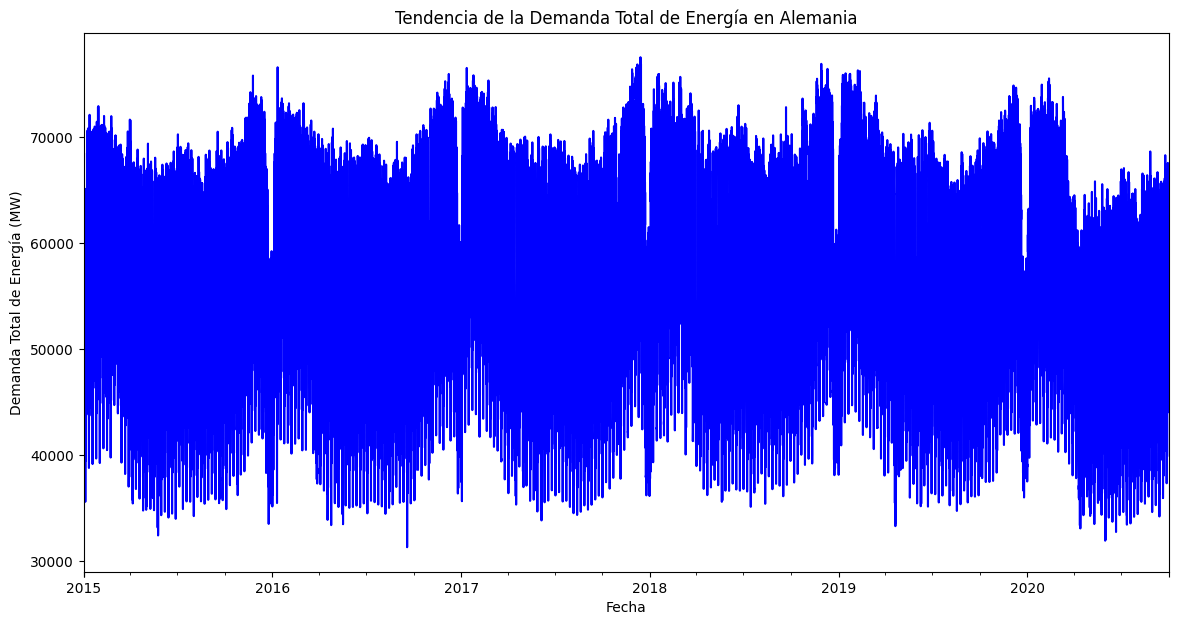

In [439]:
# Gráfico : Tendencia de la demanda total de energía en Alemania
plt.figure(figsize=(14, 7))
data['DE_load_actual_entsoe_transparency'].plot(title='Tendencia de la Demanda Total de Energía en Alemania', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Demanda Total de Energía (MW)')
plt.show()

In [440]:
# Resamplear los datos a una resolución diaria y semanal
data_diaria = data.resample('D').mean()
data_semanal = data.resample('W').mean()

In [441]:
data_semanal.head(10)

,DE_solar_generation_actual,DE_wind_generation_actual,DE_load_actual_entsoe_transparency,DE_LU_price_day_ahead
utc_timestamp,,,,
2015-01-04 00:00:00+00:00,585.101124,18507.260417,47233.739583,NaN
2015-01-11 00:00:00+00:00,787.077381,17309.958333,56191.101190,NaN
2015-01-18 00:00:00+00:00,1024.113095,15602.815476,57672.678571,NaN
2015-01-25 00:00:00+00:00,578.154762,2787.720238,58613.303571,NaN
2015-02-01 00:00:00+00:00,779.095238,10045.607143,58734.029762,NaN
2015-02-08 00:00:00+00:00,1514.208333,7860.023810,59323.898810,NaN
2015-02-15 00:00:00+00:00,1788.273810,5923.273810,58137.779762,NaN
2015-02-22 00:00:00+00:00,2295.869048,8410.101190,57802.898810,NaN
2015-03-01 00:00:00+00:00,2499.298611,10484.994048,58862.452381,NaN


In [442]:
# 1. Limpieza de Datos: Identificación y eliminación de valores NaN
missing_values = data_semanal.isnull().sum()
print(missing_values)

DE_solar_generation_actual              0
DE_wind_generation_actual               0
DE_load_actual_entsoe_transparency      0
DE_LU_price_day_ahead                 195
dtype: int64


In [443]:
# Verificar la longitud de las series
print("Longitud de data_diaria:", len(data_diaria))
print("Longitud de 'DE_LU_price_day_ahead':", len(data['DE_LU_price_day_ahead']))
# Resamplear 'DE_LU_price_day_ahead' a resolución diaria
data_diaria['DE_LU_price_day_ahead'] = data['DE_LU_price_day_ahead'].resample('D').mean()

# Asegurarse de que todas las series tengan la misma longitud
print("Longitud después del resampleo:", len(data_diaria['DE_LU_price_day_ahead']))

Longitud de data_diaria: 2101
Longitud de 'DE_LU_price_day_ahead': 50401
Longitud después del resampleo: 2101


In [444]:
data_semanal.head(500)

,DE_solar_generation_actual,DE_wind_generation_actual,DE_load_actual_entsoe_transparency,DE_LU_price_day_ahead
utc_timestamp,,,,
2015-01-04 00:00:00+00:00,585.101124,18507.260417,47233.739583,NaN
2015-01-11 00:00:00+00:00,787.077381,17309.958333,56191.101190,NaN
2015-01-18 00:00:00+00:00,1024.113095,15602.815476,57672.678571,NaN
2015-01-25 00:00:00+00:00,578.154762,2787.720238,58613.303571,NaN
2015-02-01 00:00:00+00:00,779.095238,10045.607143,58734.029762,NaN
...,...,...,...,...
2020-09-06 00:00:00+00:00,6042.875000,8044.000000,51617.744048,43.014048
2020-09-13 00:00:00+00:00,7545.089286,10386.238095,51507.630952,37.878571
2020-09-20 00:00:00+00:00,7930.815476,8192.279762,52181.327381,48.491190


In [445]:
# Graficar variables en resolución original, diaria y semanal
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

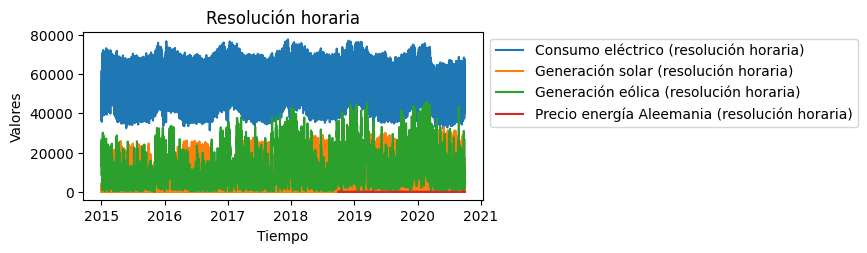

In [446]:
# Gráfica en resolución original
plt.subplot(2, 1, 2)
plt.plot(data.index, data['DE_load_actual_entsoe_transparency'], label='Consumo eléctrico (resolución horaria)')
plt.plot(data.index, data['DE_solar_generation_actual'], label='Generación solar (resolución horaria)')
plt.plot(data.index, data['DE_wind_generation_actual'], label='Generación eólica (resolución horaria)') 
plt.plot(data.index, data['DE_LU_price_day_ahead'], label='Precio energía Aleemania (resolución horaria)')
# Configurar la leyenda fuera de la gráfica
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Ajusta la posición de la leyenda

plt.title('Resolución horaria')
plt.xlabel('Tiempo')
plt.ylabel('Valores')

# Ajustar el layout para evitar superposiciones
plt.subplots_adjust(right=0.75)  # Ajusta el espacio derecho para dejar lugar a la leyenda

# Mostrar la gráfica
plt.show()

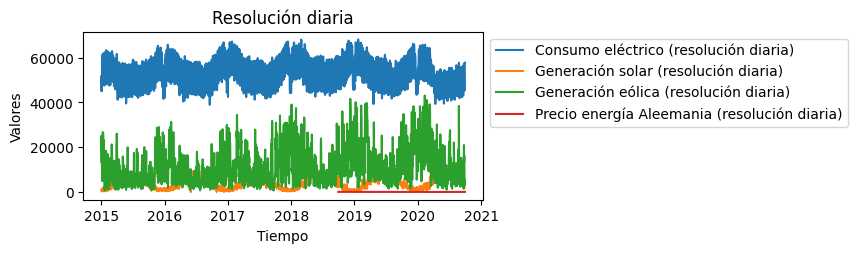

In [447]:
# Gráfica en resolución diaria
plt.subplot(2, 1, 2)
plt.plot(data_diaria.index, data_diaria['DE_load_actual_entsoe_transparency'], label='Consumo eléctrico (resolución diaria)')
plt.plot(data_diaria.index, data_diaria['DE_solar_generation_actual'], label='Generación solar (resolución diaria)')
plt.plot(data_diaria.index, data_diaria['DE_wind_generation_actual'], label='Generación eólica (resolución diaria)')
plt.plot(data_diaria.index, data_diaria['DE_LU_price_day_ahead'], label='Precio energía Aleemania (resolución diaria)')
# Configurar la leyenda fuera de la gráfica
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Ajusta la posición de la leyenda

plt.title('Resolución diaria')
plt.xlabel('Tiempo')
plt.ylabel('Valores')

# Ajustar el layout para evitar superposiciones
plt.subplots_adjust(right=0.75)  # Ajusta el espacio derecho para dejar lugar a la leyenda

# Mostrar la gráfica
plt.show()

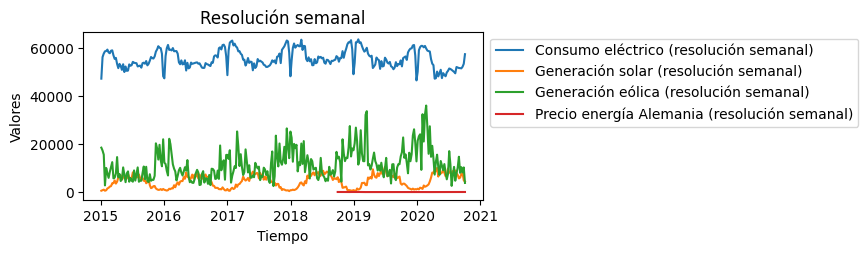

In [448]:
# Gráfica en resolución semanal
plt.subplot(2, 1, 2)
plt.plot(data_semanal.index, data_semanal['DE_load_actual_entsoe_transparency'], label='Consumo eléctrico (resolución semanal)')
plt.plot(data_semanal.index, data_semanal['DE_solar_generation_actual'], label='Generación solar (resolución semanal)')
plt.plot(data_semanal.index, data_semanal['DE_wind_generation_actual'], label='Generación eólica (resolución semanal)')
plt.plot(data_semanal.index, data_semanal['DE_LU_price_day_ahead'], label='Precio energía Alemania (resolución semanal)')
# Configurar la leyenda fuera de la gráfica
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Ajusta la posición de la leyenda

plt.title('Resolución semanal')
plt.xlabel('Tiempo')
plt.ylabel('Valores')

# Ajustar el layout para evitar superposiciones
plt.subplots_adjust(right=0.75)  # Ajusta el espacio derecho para dejar lugar a la leyenda

# Mostrar la gráfica
plt.show()

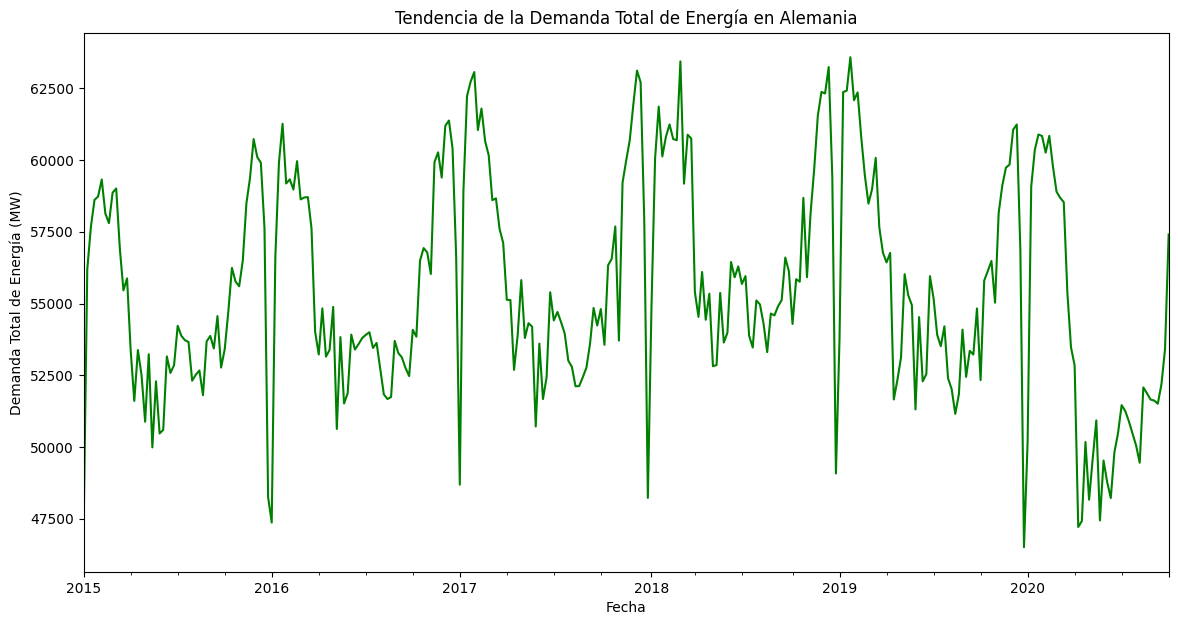

In [457]:
# 2. Análisis de Tendencias y Patrones Estacionales
# Gráfico 2: Tendencia de la demanda total de energía en Alemania
plt.figure(figsize=(14, 7))
data_semanal['DE_load_actual_entsoe_transparency'].plot(title='Tendencia de la Demanda Total de Energía en Alemania', color='green')
plt.xlabel('Fecha')
plt.ylabel('Demanda Total de Energía (MW)')
plt.show()

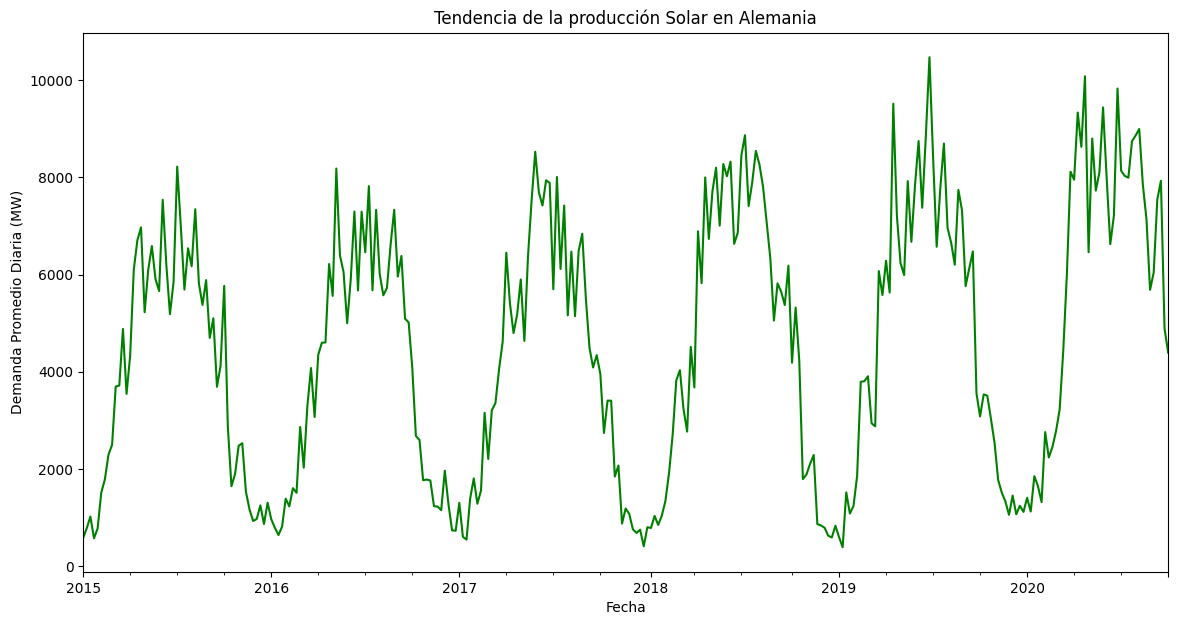

In [450]:
# Gráfico 3: Estacionalidad semanal de la demanda de energía en Alemania
plt.figure(figsize=(14, 7))
data_semanal['DE_solar_generation_actual'].plot(title='Tendencia de la producción Solar en Alemania', color='green')
plt.xlabel('Fecha')
plt.ylabel('Demanda Promedio Diaria (MW)')
plt.show()

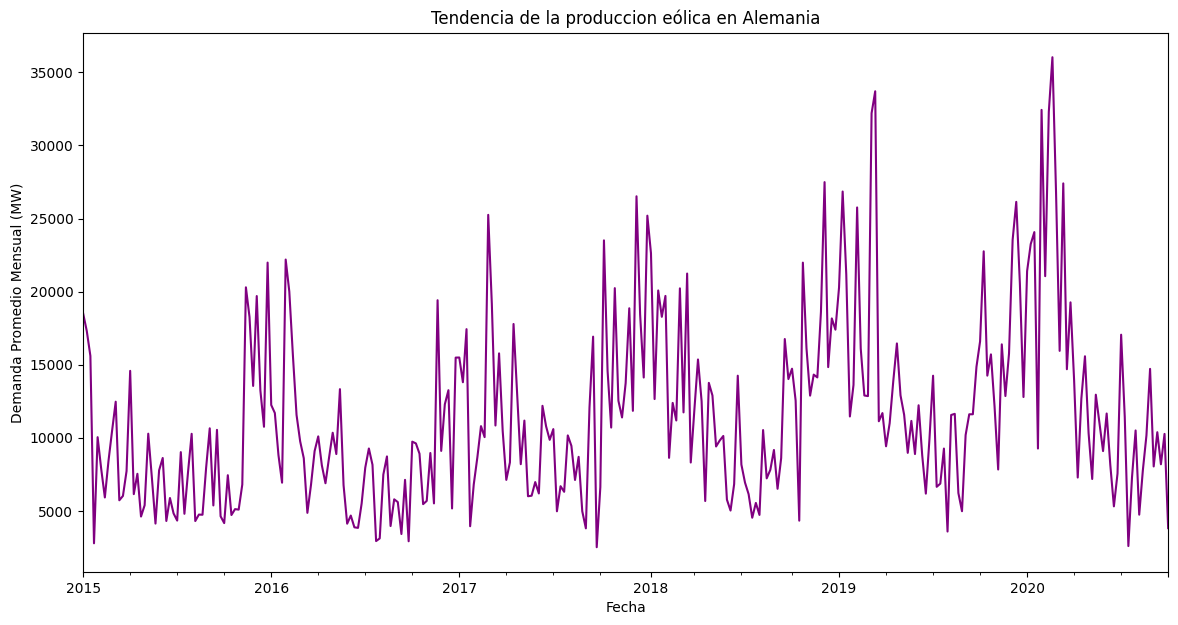

In [451]:
# Gráfico 4: Estacionalidad mensual de la demanda de energía en Alemania
plt.figure(figsize=(14, 7))
data_semanal['DE_wind_generation_actual'].plot(title='Tendencia de la produccion eólica en Alemania', color='purple')
plt.xlabel('Fecha')
plt.ylabel('Demanda Promedio Mensual (MW)')
plt.show()

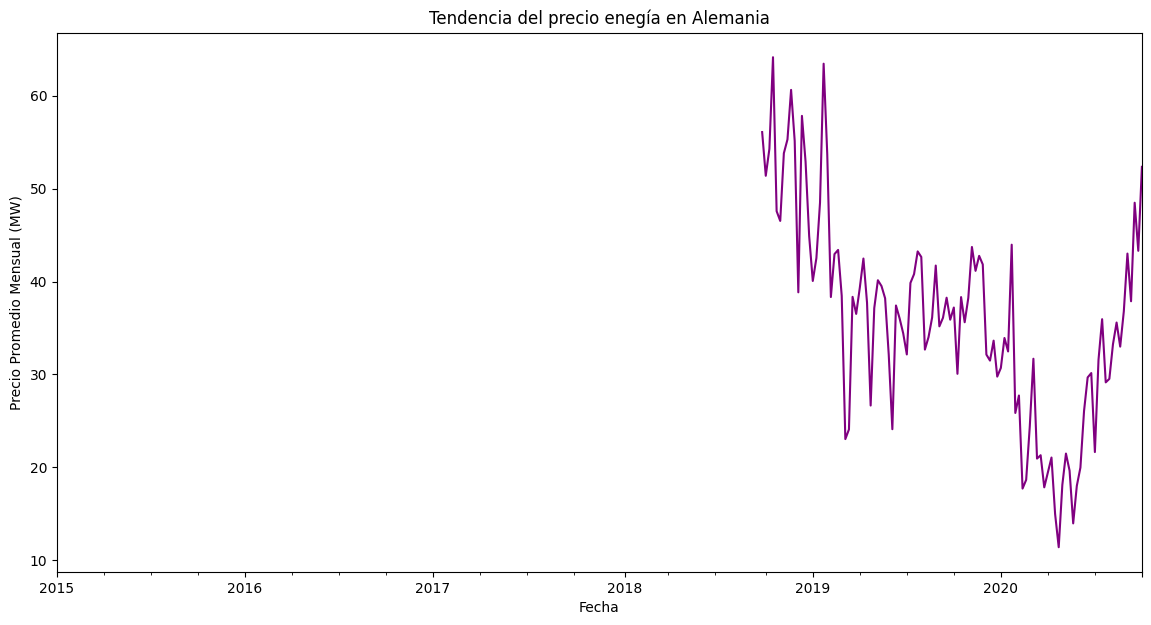

In [452]:
# Gráfico 5: Estacionalidad mensual del precio de la energía en Alemania
plt.figure(figsize=(14, 7))
data_semanal['DE_LU_price_day_ahead'].plot(title='Tendencia del precio enegía en Alemania', color='purple')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio Mensual (MW)')
plt.show()

In [453]:
# 4. Correlación de Características
correlation_matrix = data_semanal.corr()

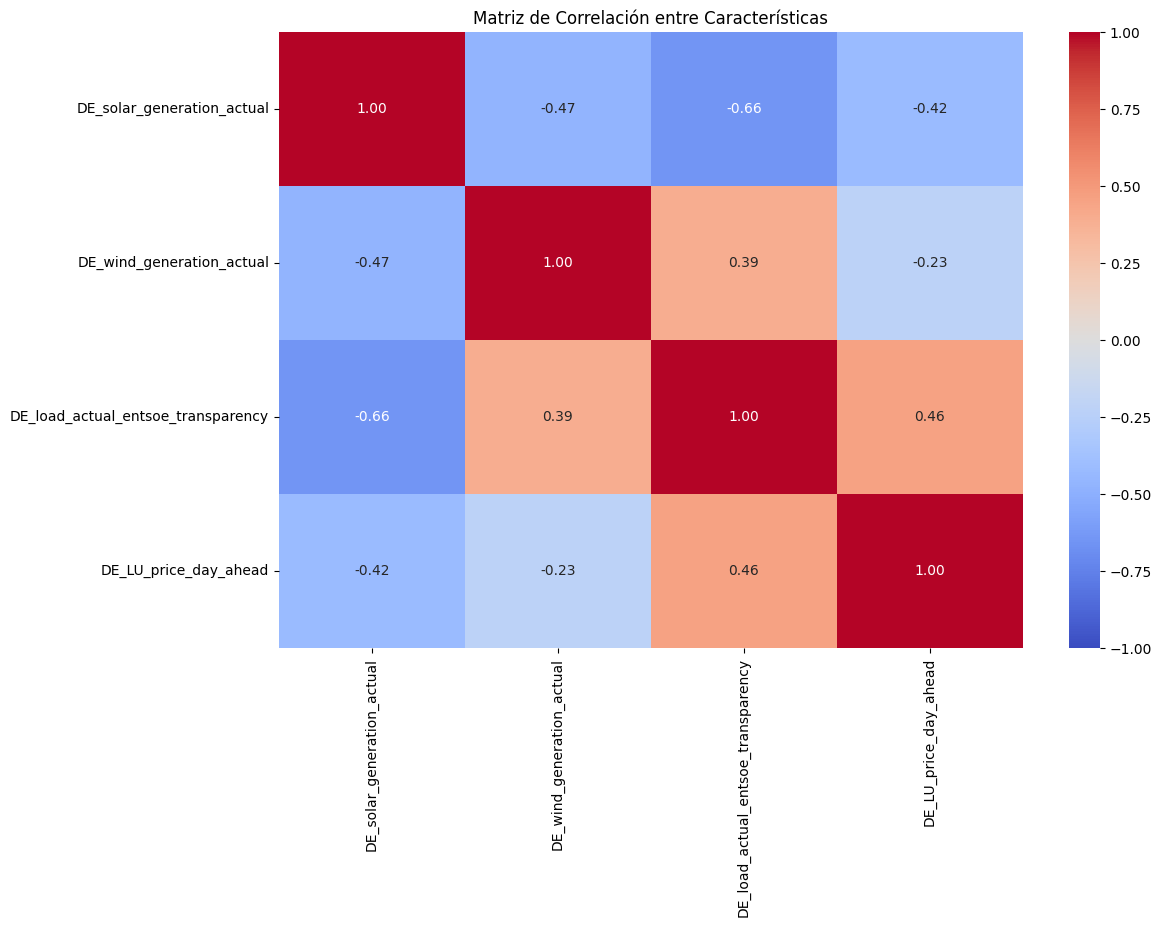

Correlaciones con la variable objetivo:
 DE_load_actual_entsoe_transparency    1.000000
DE_LU_price_day_ahead                 0.456696
DE_wind_generation_actual             0.394931
DE_solar_generation_actual           -0.655445
Name: DE_load_actual_entsoe_transparency, dtype: float64
Características con correlación significativa: ['DE_load_actual_entsoe_transparency', 'DE_solar_generation_actual']


In [454]:
# Gráfico 6: Matriz de Correlación entre las características
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Características')
plt.show()
# Filtrar las correlaciones más fuertes con la variable objetivo
target_correlation = correlation_matrix['DE_load_actual_entsoe_transparency'].sort_values(ascending=False)
print("Correlaciones con la variable objetivo:\n", target_correlation)

# Seleccionar las características con una correlación absoluta mayor a 0.5 (umbral ajustable)
significant_features = target_correlation[abs(target_correlation) > 0.5].index.tolist()
print("Características con correlación significativa:", significant_features)

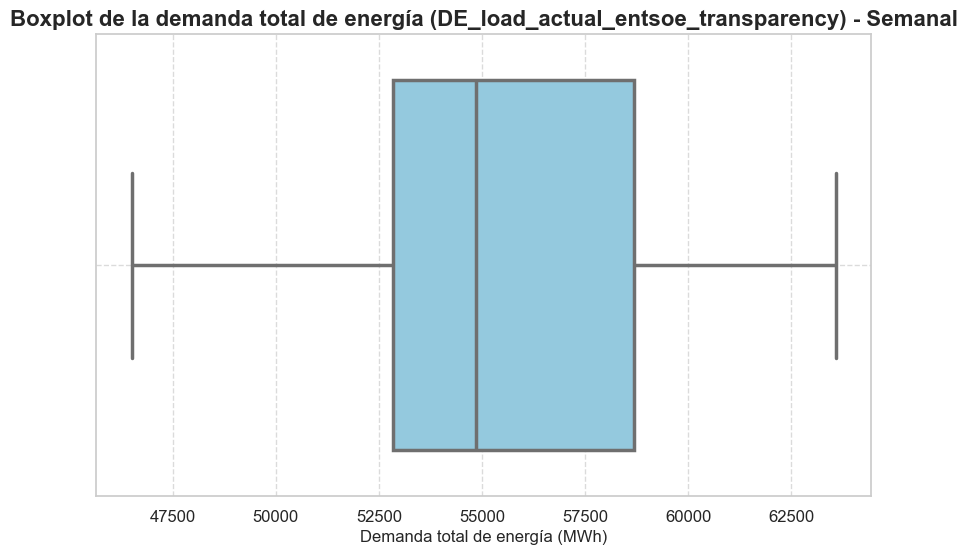

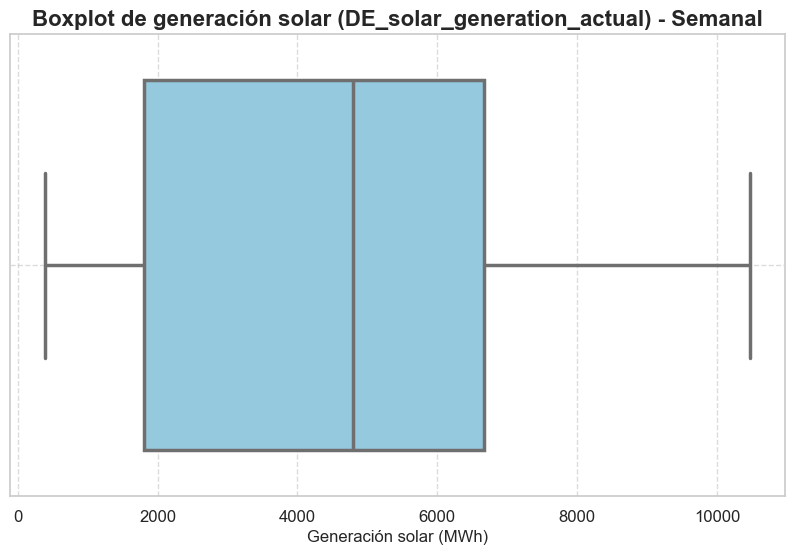

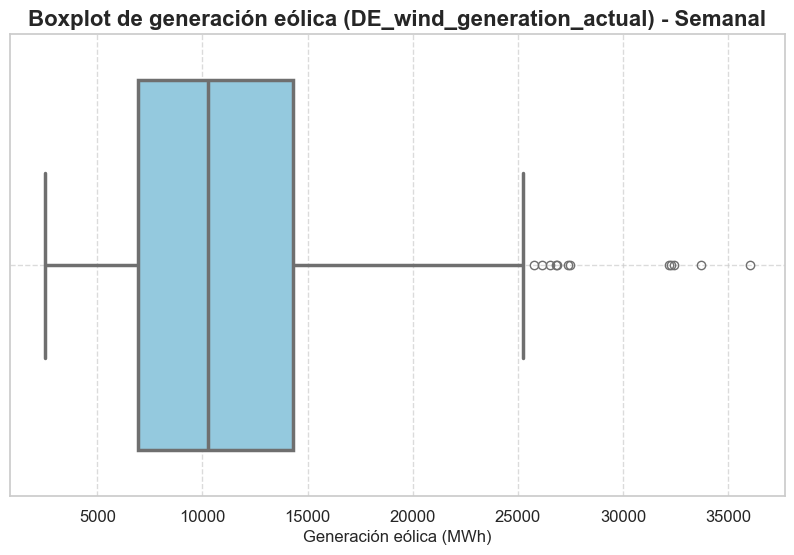

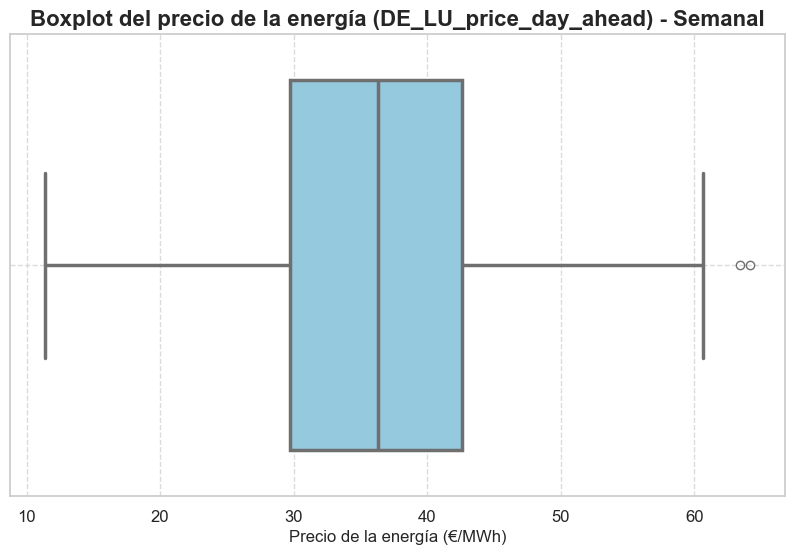

In [460]:
# 5. Análisis de Outliers
# Estilo visual de Seaborn
sns.set(style="whitegrid")

# Crear un subconjunto de las columnas relevantes a partir de los datos semanales
columnas_relevantes = ['DE_load_actual_entsoe_transparency', 'DE_solar_generation_actual', 
                       'DE_wind_generation_actual', 'DE_LU_price_day_ahead']

# Filtrar los datos con las columnas seleccionadas
data_relevante = data_semanal[columnas_relevantes]

# Función para generar los boxplots con un diseño mejorado
def crear_boxplot(data, titulo, xlabel):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data, color="skyblue", linewidth=2.5)
    plt.title(titulo, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Boxplot para la demanda total de energía (DE_load_actual_entsoe_transparency)
crear_boxplot(data_relevante['DE_load_actual_entsoe_transparency'].dropna(),
              'Boxplot de la demanda total de energía (DE_load_actual_entsoe_transparency) - Semanal',
              'Demanda total de energía (MWh)')

# Boxplot para la generación solar (DE_solar_generation_actual)
crear_boxplot(data_relevante['DE_solar_generation_actual'].dropna(),
              'Boxplot de generación solar (DE_solar_generation_actual) - Semanal',
              'Generación solar (MWh)')

# Boxplot para la generación eólica (DE_wind_generation_actual)
crear_boxplot(data_relevante['DE_wind_generation_actual'].dropna(),
              'Boxplot de generación eólica (DE_wind_generation_actual) - Semanal',
              'Generación eólica (MWh)')

# Boxplot para el precio de la energía (DE_LU_price_day_ahead)
crear_boxplot(data_relevante['DE_LU_price_day_ahead'].dropna(),
              'Boxplot del precio de la energía (DE_LU_price_day_ahead) - Semanal',
              'Precio de la energía (€/MWh)')


In [456]:
data.to_csv(f'processed_data_{n}.csv')